In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Paper Title**

**An** **Improved** **Cardiovascular** **Disease** **Prediction**
**Model** **Using** **Ensembling** **of** **Diverse** **Machine**
**Learning** **Classifiers**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/heart.csv', delimiter = ',')

#EDA

0 - absence of HD
1 - presence of HD
1    165
0    138
Name: target, dtype: int64


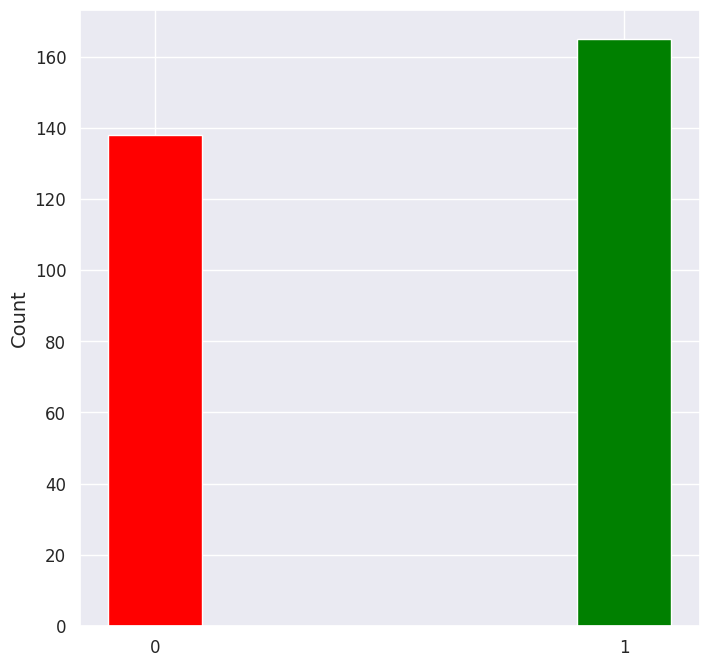

In [ ]:
from matplotlib.pyplot import rcParams
import matplotlib.pyplot as plt
import seaborn as sns

print("0 - absence of HD")
print("1 - presence of HD")

print(dataset.target.value_counts())

# 0 - absence of HD
# 1 - presence of HD

rcParams['figure.figsize'] = 8,8
plt.bar(dataset['target'].unique(), dataset['target'].value_counts(), color = ['green', 'red'],width=0.2)
plt.xticks([0, 1])
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.ylabel('Count',size=14)
#plt.title('Count of each Target Class', size = 25)
plt.savefig('target-count.eps')
plt.show()
#files.download('target-count.eps')

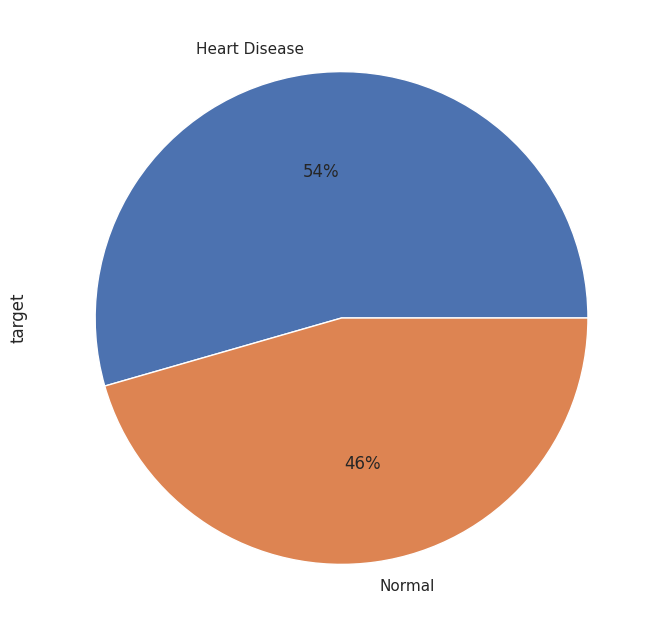

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Plotting attrition of employees
#fig, ax1 = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

plt.figure(figsize=(8,8))
f1= dataset['target'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', autopct = "%1.0f%%",labels=["Heart Disease","Normal"]);
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.savefig('target-count-pie.eps')
plt.show()
files.download('target-count-pie.eps')

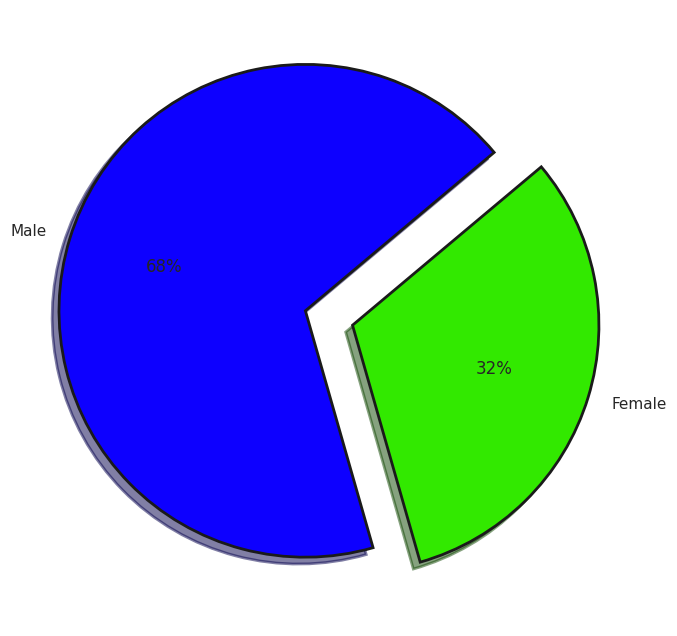

In [ ]:
plt.figure(figsize=(8,8))
dataset["sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",5),startangle = 40,labels=["Male","Female"], wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.ylabel("")
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

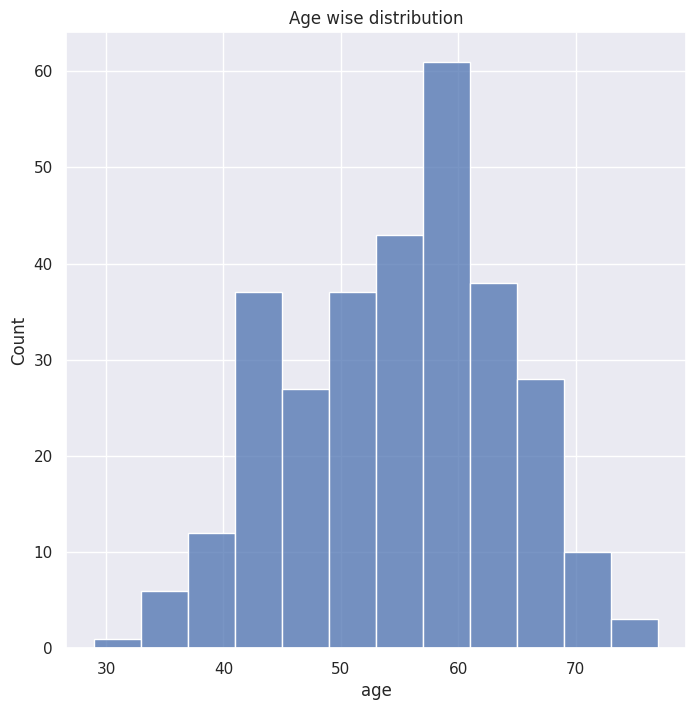

1    207
0     96
Name: sex, dtype: int64


In [ ]:
sns.histplot(dataset['age'])
plt.title("Age wise distribution")
plt.show()
print(dataset["sex"].value_counts())

<ipython-input-70-410695030cdd>:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(attr_0['sex'], palette='viridis')


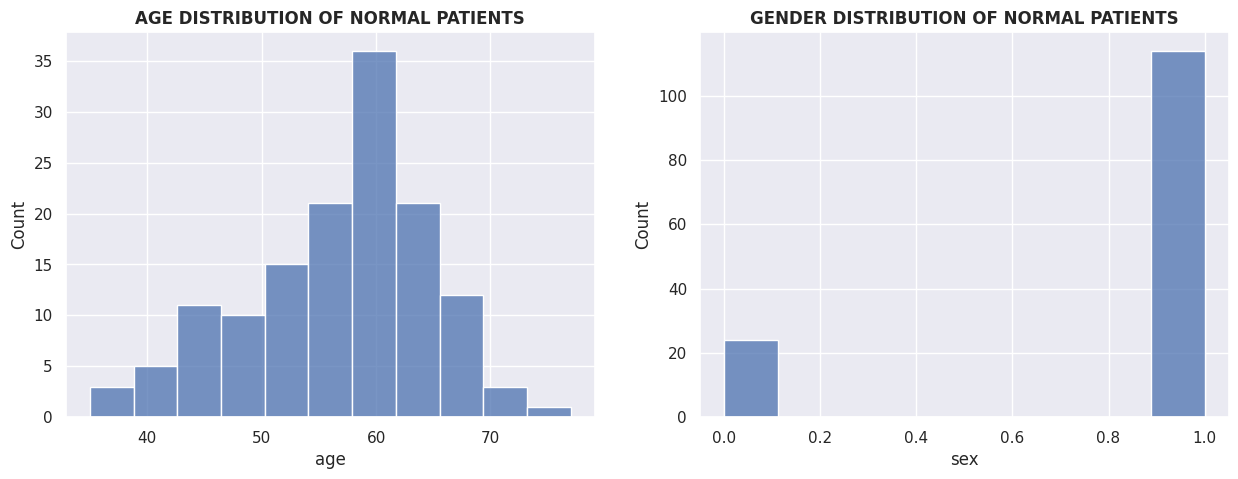

<ipython-input-70-410695030cdd>:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(attr_1['sex'], palette='viridis')


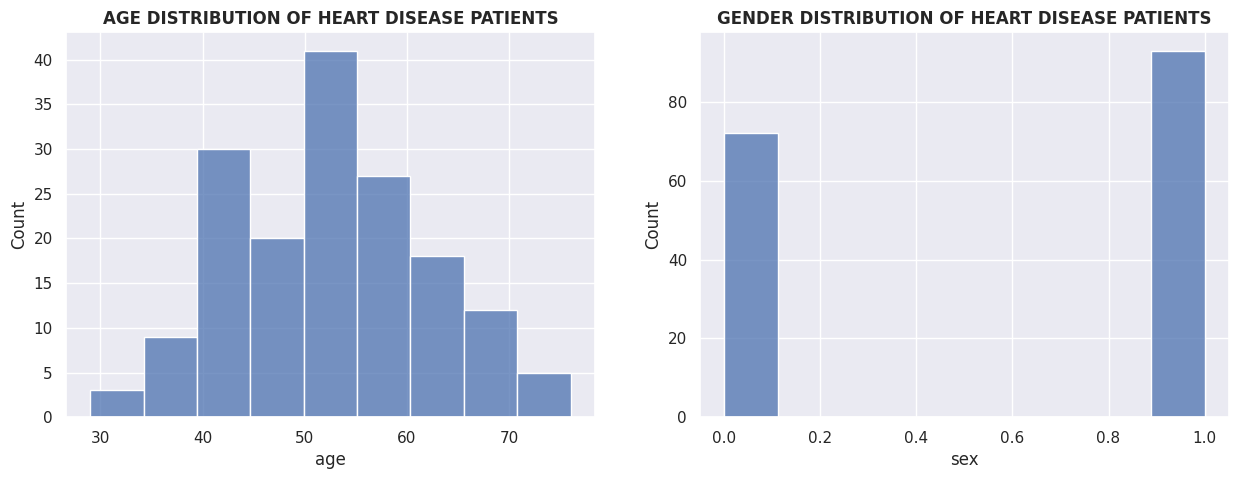

In [ ]:
attr_1=dataset[dataset['target']==1]

attr_0=dataset[dataset['target']==0]

# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.histplot(attr_0['age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=12, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.histplot(attr_0['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=12, weight='bold' )
plt.show()

#plotting heart patients

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.histplot(attr_1['age'])
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=12, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.histplot(attr_1['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=12, weight='bold' )
plt.show()

<ipython-input-71-17078ec17c77>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(attr_1['cp'], palette='viridis')


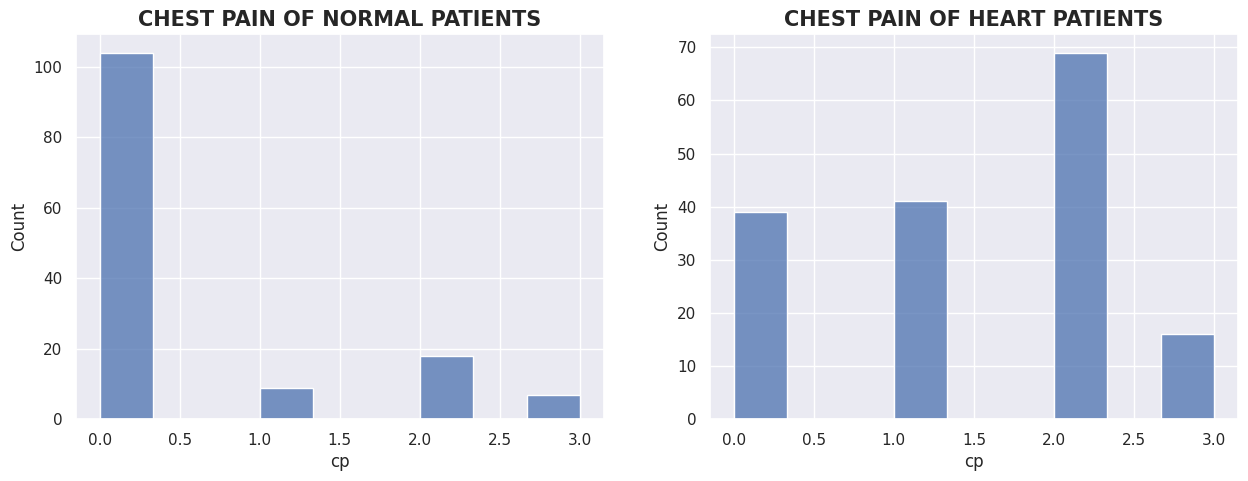

In [ ]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.histplot(attr_0['cp'])
plt.title('CHEST PAIN OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.histplot(attr_1['cp'], palette='viridis')
plt.title('CHEST PAIN OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

<ipython-input-72-480d0893c6f6>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(attr_1['restecg'], palette='viridis')


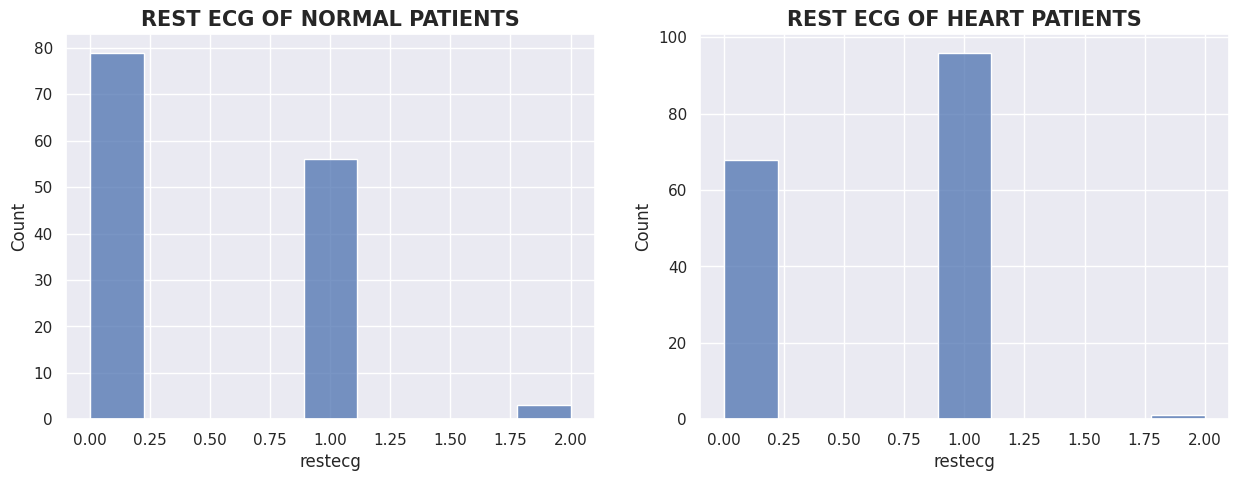

In [ ]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.histplot(attr_0['restecg'])
plt.title('REST ECG OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.histplot(attr_1['restecg'], palette='viridis')
plt.title('REST ECG OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

<ipython-input-73-e486a4cdf851>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(attr_1['slope'], palette='viridis')


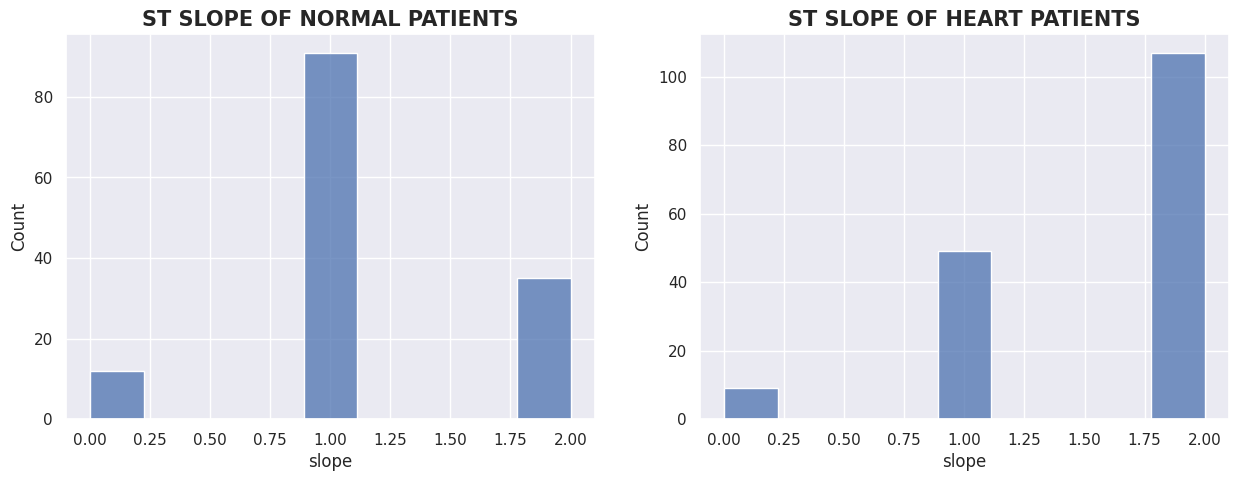

In [ ]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.histplot(attr_0['slope'])
plt.title('ST SLOPE OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.histplot(attr_1['slope'], palette='viridis')
plt.title('ST SLOPE OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

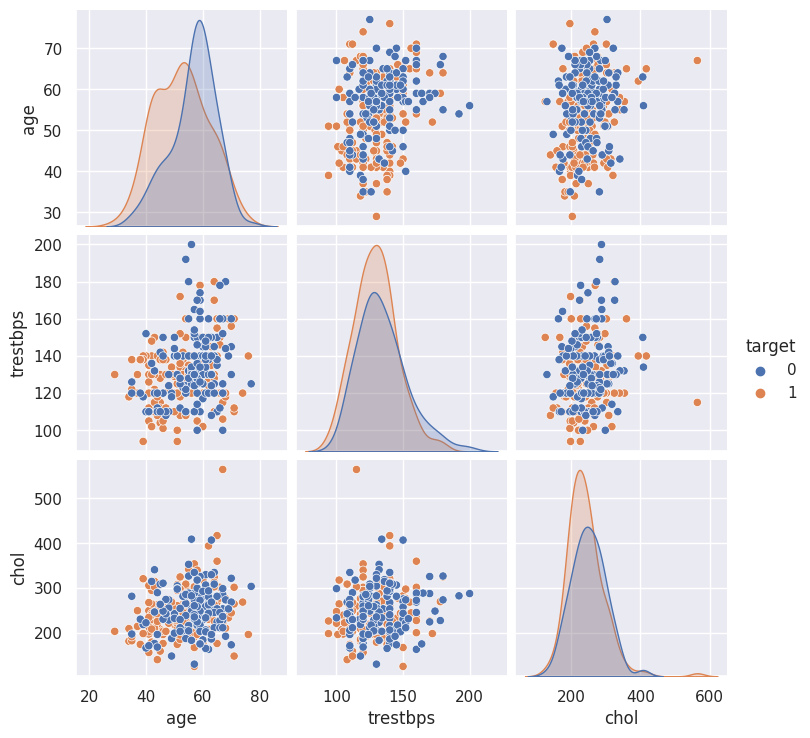

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sns.pairplot(dataset, hue = 'target', vars = ['age', 'trestbps', 'chol'] )
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('feature', size = 14)
plt.ylabel('feature',size=14)
plt.savefig('pairplot.eps')
plt.show()
files.download('pairplot.eps')

<Axes: xlabel='trestbps', ylabel='chol'>

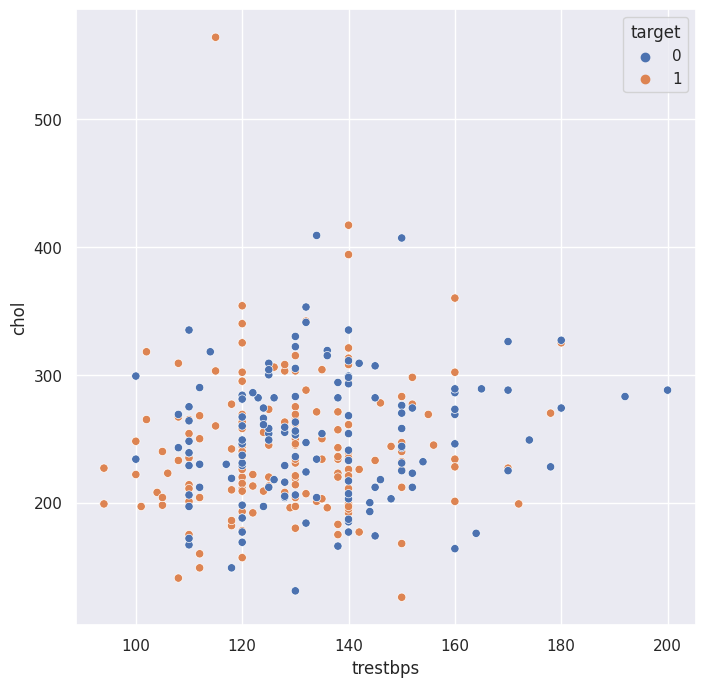

In [ ]:
sns.scatterplot(x = 'trestbps', y = 'chol', hue = 'target', data = dataset)

<Axes: xlabel='trestbps', ylabel='age'>

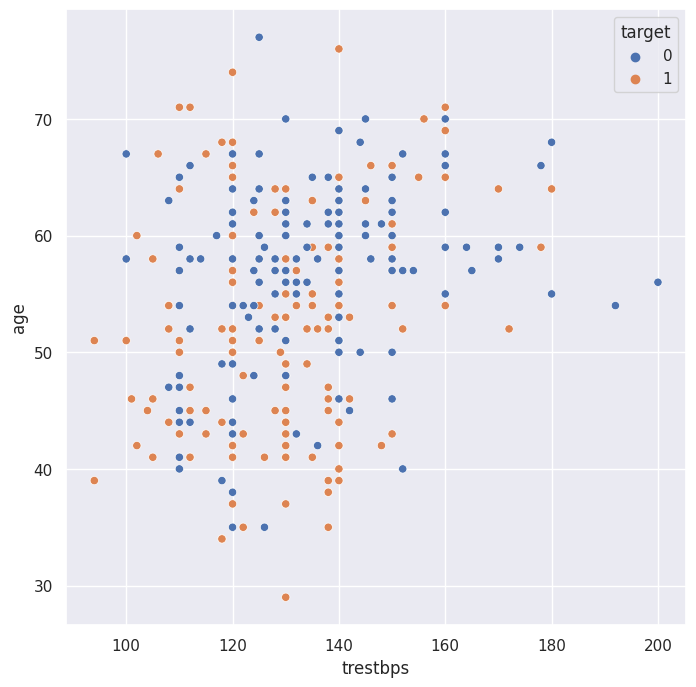

In [ ]:
sns.scatterplot(x = 'trestbps', y = 'age', hue = 'target', data = dataset)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

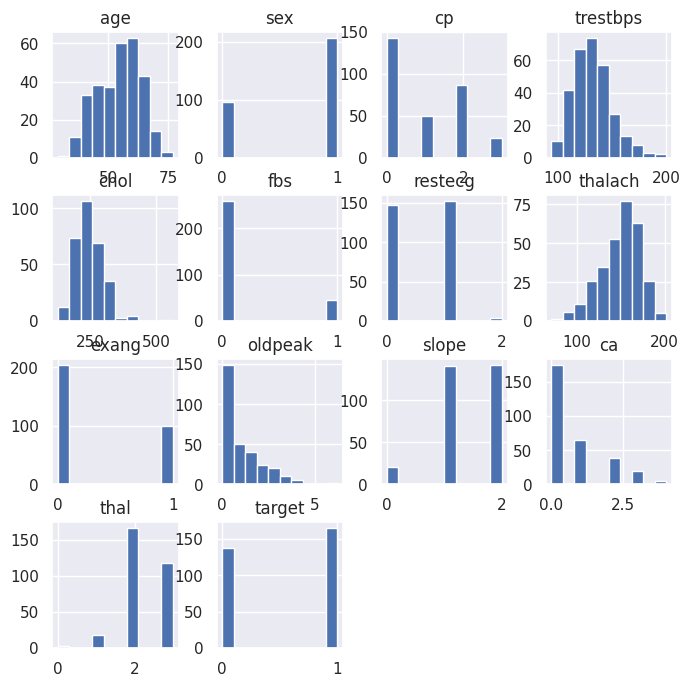

In [ ]:
dataset.hist()

In [ ]:
print("correlations among attributes - closer to +/- 1 are more likely to be related")
print()
correlation=dataset.corr()
correlation

correlations among attributes - closer to +/- 1 are more likely to be related



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


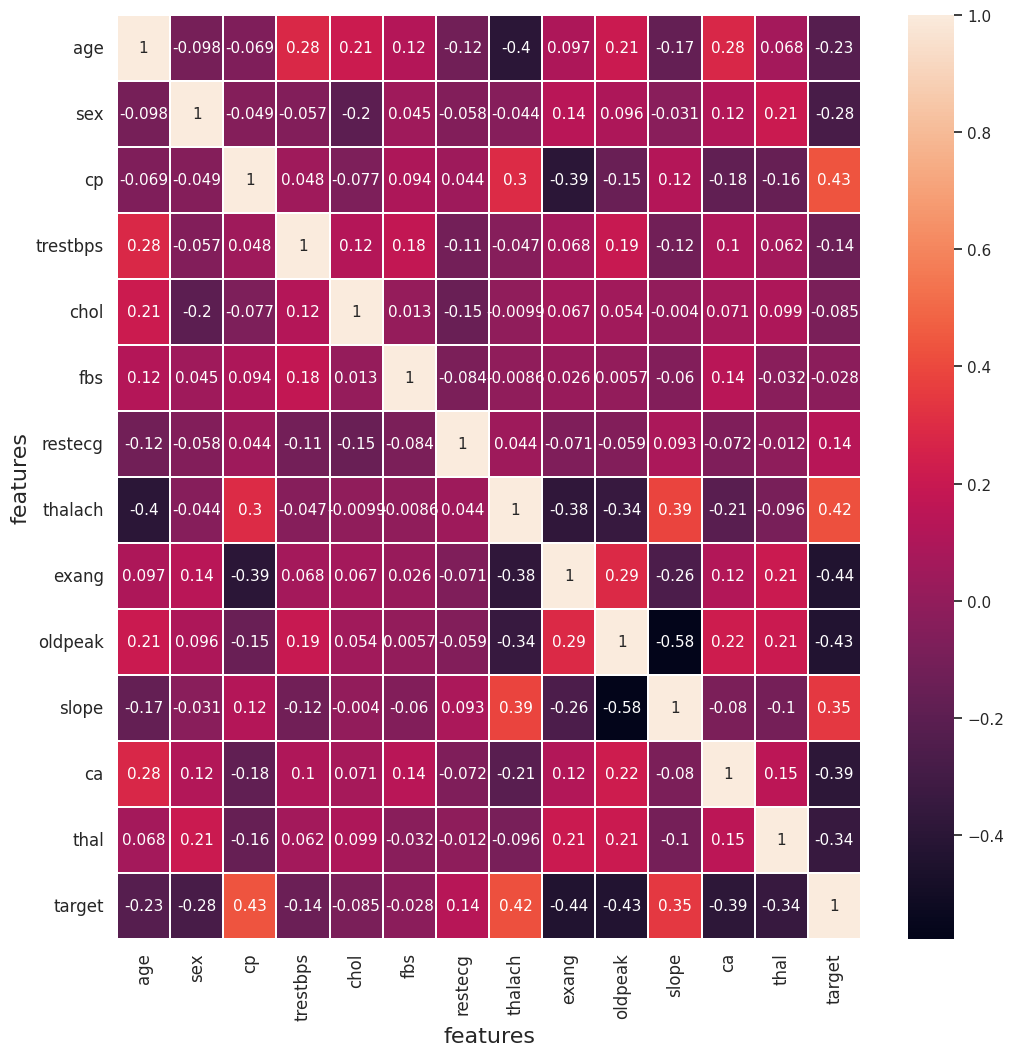

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

plt.figure(figsize=(12,12))
sns.heatmap(dataset.corr(),linewidth=.02,annot=True,annot_kws={'size': 11})
plt.xticks(rotation=90,size = 12)
plt.yticks(rotation=360,size = 12)
plt.xlabel('features', fontsize=16)
plt.ylabel('features', fontsize=16)
plt.savefig('correlationfigure.eps')
plt.show()
files.download('correlationfigure.eps')

<Axes: >

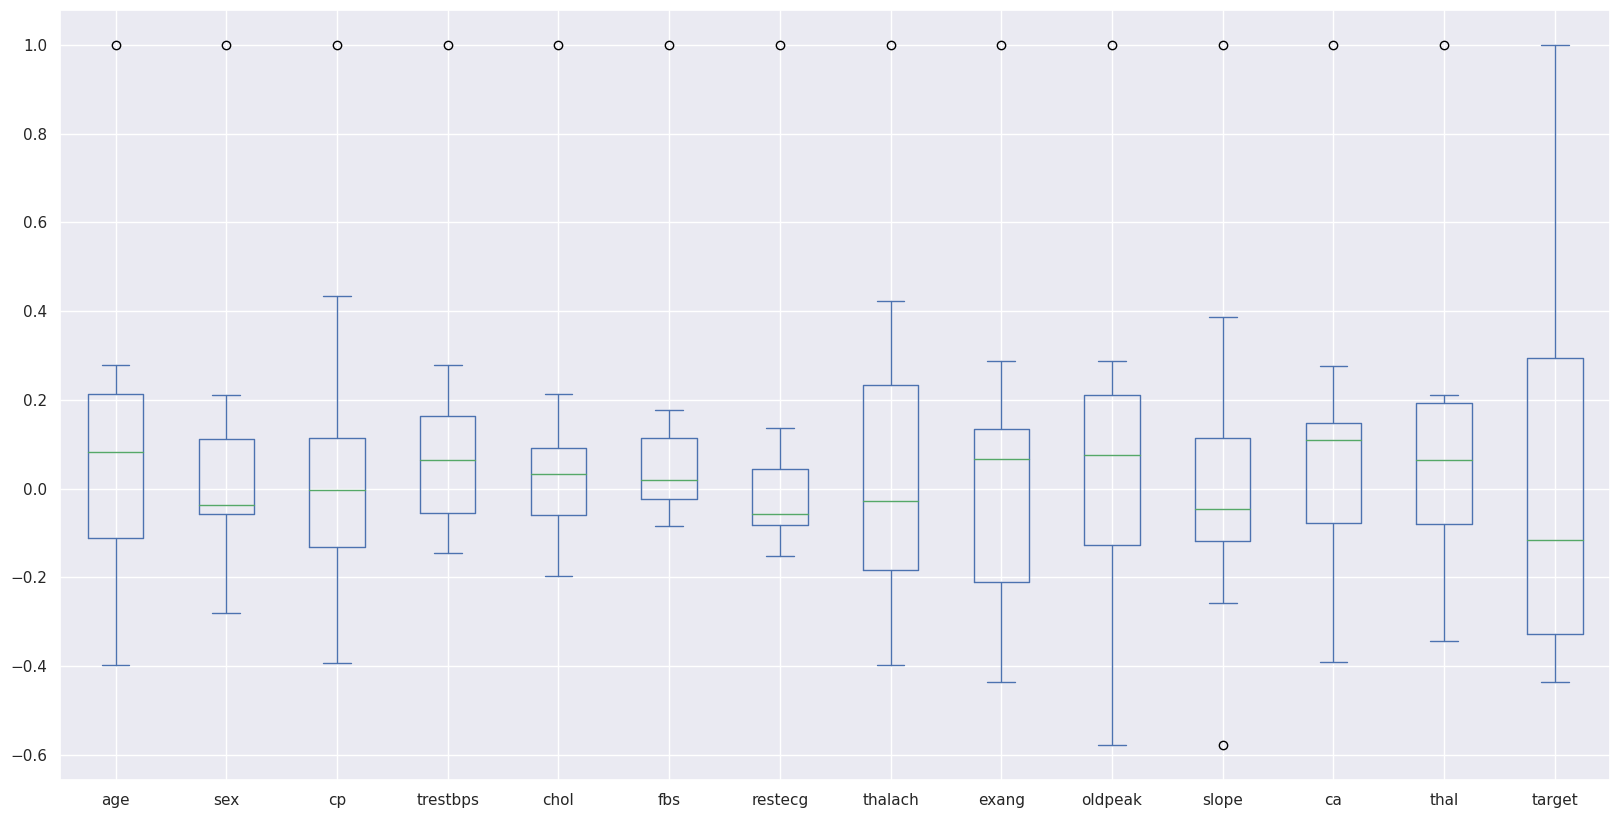

In [ ]:
correlation.plot(kind="box",figsize=(20,10))

#Pre-Processing

In [ ]:
#checking for missing or null values

print("Null values/missing values -")

dataset.isnull().values.any()

Null values/missing values -


False

#Outlier Analysis

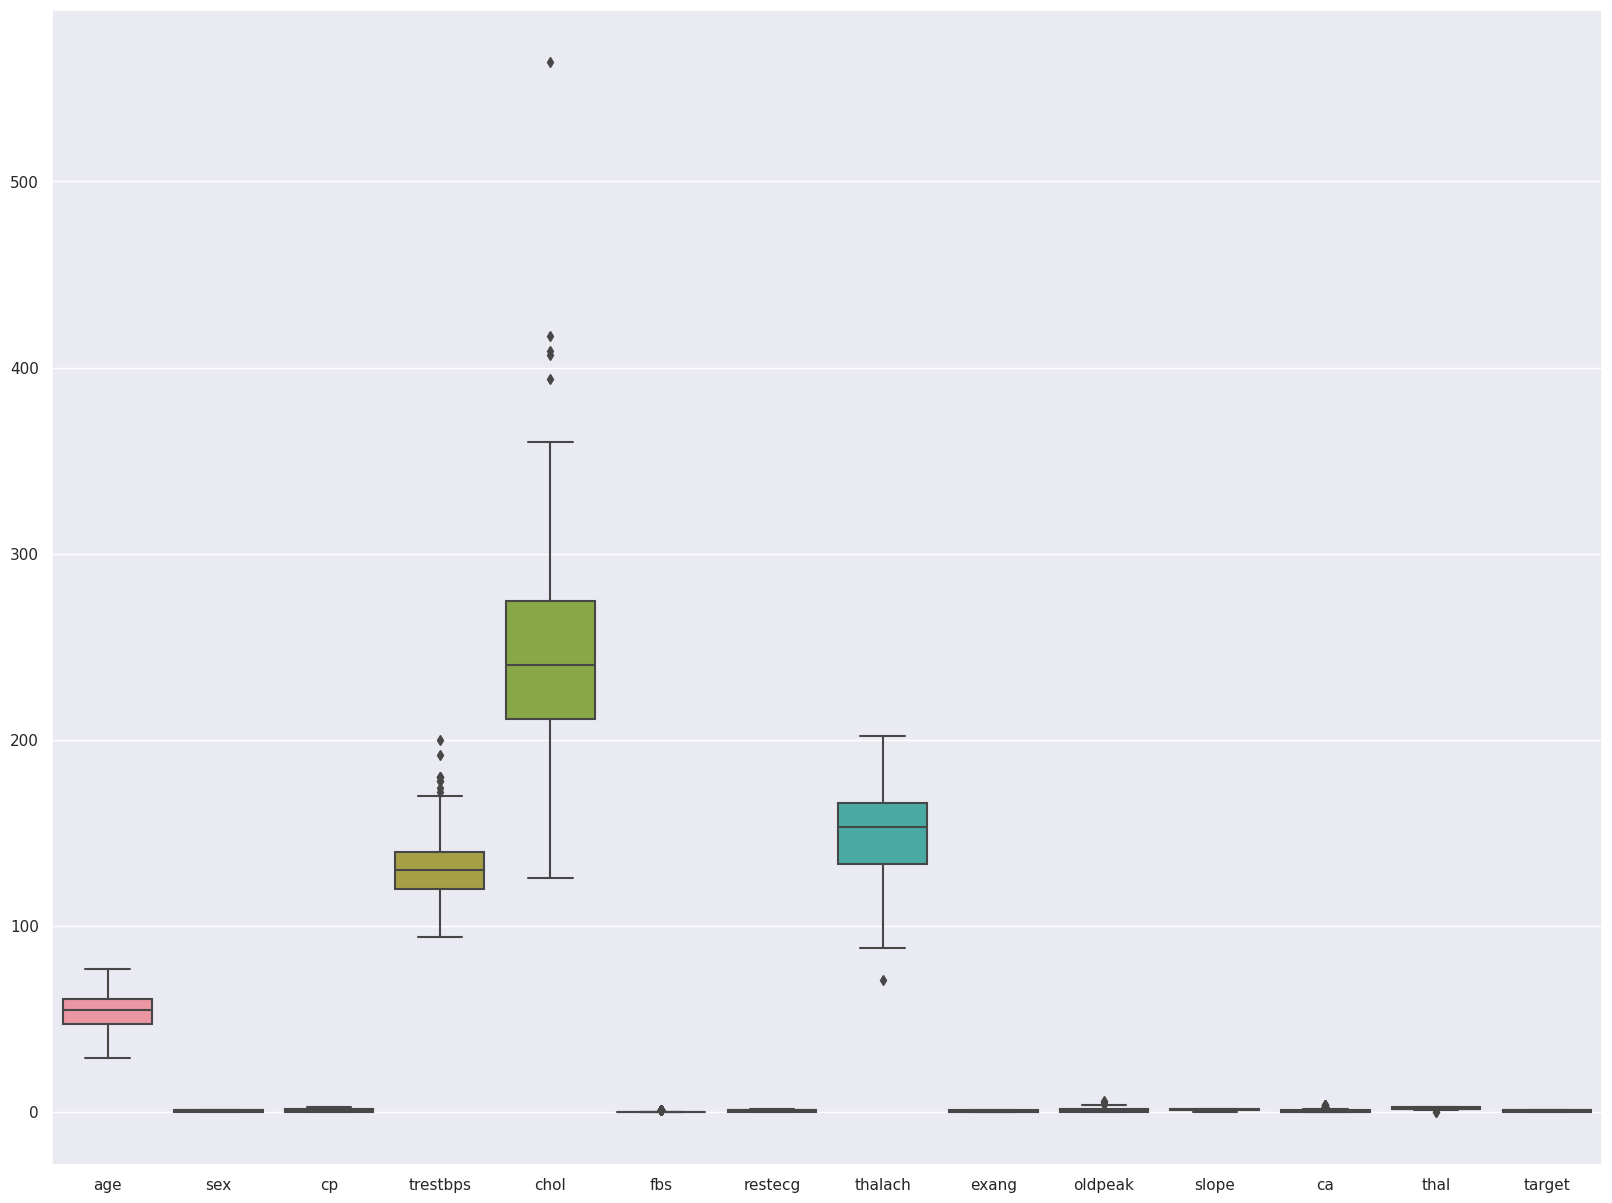

In [ ]:
plt.figure(figsize=(20,15), facecolor='w')
sns.boxplot(data=dataset)
plt.show()

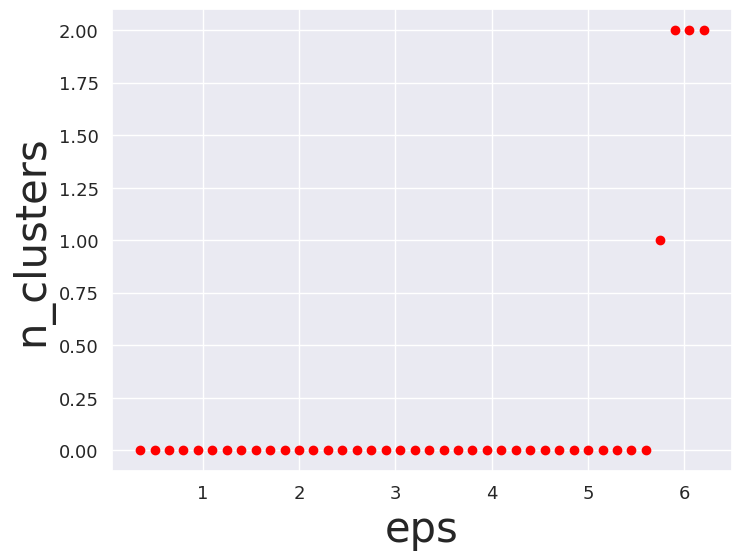

In [ ]:
from sklearn.cluster import DBSCAN

X = dataset.drop(['target'], axis=1)

eps=0.2
for i in range(40):
    eps +=0.15
    model = DBSCAN(eps, min_samples=3).fit(X)
    labels = model.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    plt.figure(2, figsize=(8, 6))
    plt.plot(eps,  n_clusters_,'-o', c='red')
    plt.ylabel('n_clusters', fontsize=30)
    plt.xlabel('eps',fontsize=30)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
from collections import Counter

def findOutliers(X):
  model = DBSCAN(eps=6.0, min_samples=3).fit(X)
  labels=model.labels_
  count= Counter(model.labels_)
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  outliers = dataset[model.labels_ != -1];
  return outliers

In [ ]:
findOutliers(dataset.drop(['target'], axis=1))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2,1
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3,0
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
211,61,1,0,120,260,0,1,140,1,3.6,1,1,3,0
277,57,1,1,124,261,0,1,141,0,0.3,2,0,3,0


#Treating Outliers

In [ ]:
print(dataset.shape)
dataset = dataset.drop([dataset.index[10], dataset.index[49],dataset.index[188],dataset.index[201],dataset.index[211],dataset.index[277]])
print(dataset.shape)

(303, 14)
(297, 14)


In [ ]:
print("correlations among attributes - closer to +/- 1 are more likely to be related")
print()
correlation=dataset.corr()
correlation

correlations among attributes - closer to +/- 1 are more likely to be related



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.102695,-0.064079,0.284388,0.212318,0.123147,-0.117417,-0.396779,0.090610,0.204459,-0.168782,0.277191,0.064063,-0.223505
sex,-0.102695,1.000000,-0.050595,-0.054356,-0.201530,0.048198,-0.070053,-0.041910,0.138950,0.087183,-0.026387,0.117462,0.201902,-0.273627
cp,-0.064079,-0.050595,1.000000,0.045897,-0.076345,0.091470,0.041408,0.297039,-0.394230,-0.141726,0.125618,-0.186622,-0.164445,0.444439
trestbps,0.284388,-0.054356,0.045897,1.000000,0.125714,0.178025,-0.114984,-0.051035,0.075517,0.203854,-0.125128,0.103371,0.068131,-0.153071
chol,0.212318,-0.201530,-0.076345,0.125714,1.000000,0.013527,-0.152953,-0.007895,0.064574,0.051278,-0.003260,0.070331,0.097188,-0.083157
fbs,0.123147,0.048198,0.091470,0.178025,0.013527,1.000000,-0.082829,-0.008160,0.026092,0.008630,-0.059020,0.136719,-0.027448,-0.032024
restecg,-0.117417,-0.070053,0.041408,-0.114984,-0.152953,-0.082829,1.000000,0.044136,-0.067604,-0.062105,0.093623,-0.071675,-0.018829,0.146539
thalach,-0.396779,-0.041910,0.297039,-0.051035,-0.007895,-0.008160,0.044136,1.000000,-0.377007,-0.343733,0.388044,-0.212780,-0.093775,0.422248
exang,0.090610,0.138950,-0.394230,0.075517,0.064574,0.026092,-0.067604,-0.377007,1.000000,0.273076,-0.250572,0.110336,0.202822,-0.436244
oldpeak,0.204459,0.087183,-0.141726,0.203854,0.051278,0.008630,-0.062105,-0.343733,0.273076,1.000000,-0.578014,0.220255,0.203608,-0.429233


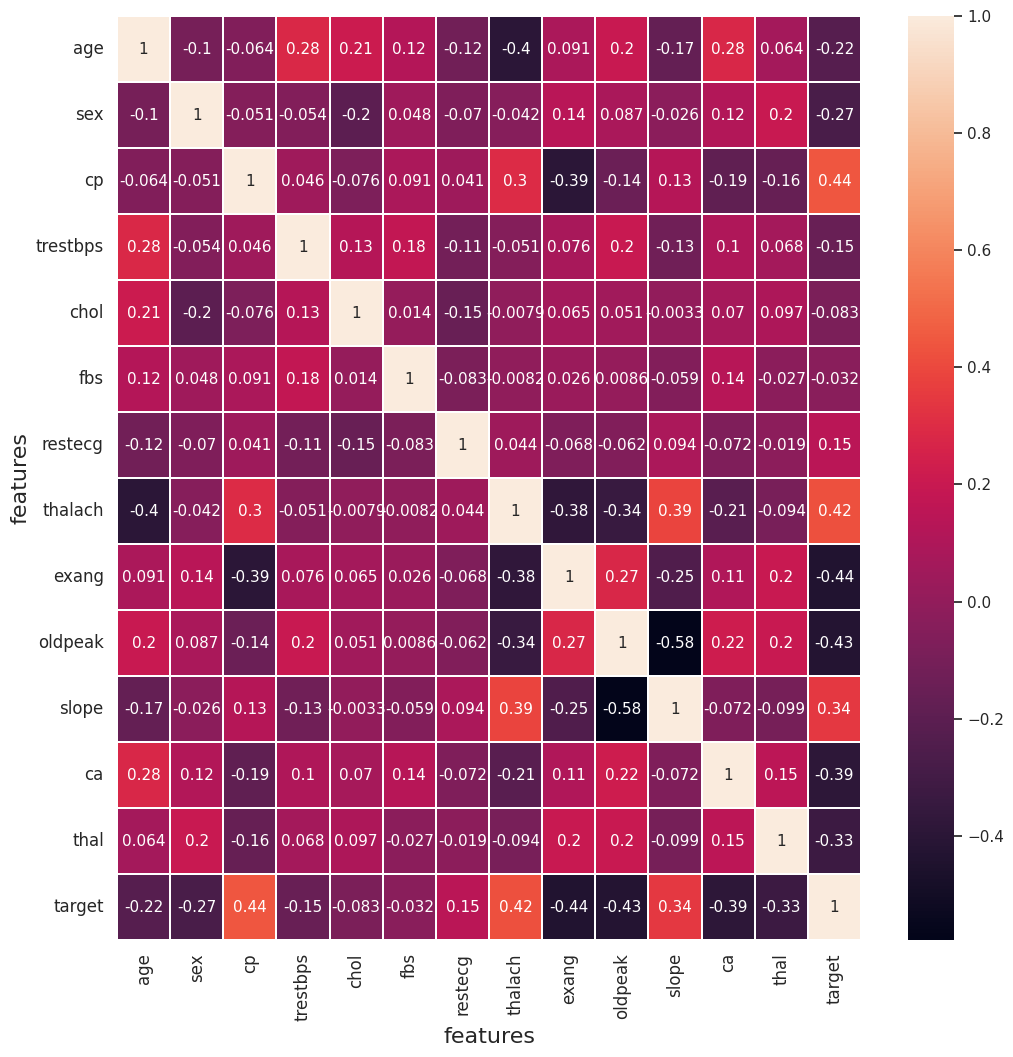

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

plt.figure(figsize=(12,12))
sns.heatmap(dataset.corr(),linewidth=.02,annot=True,annot_kws={'size': 11})
plt.xticks(rotation=90,size = 12)
plt.yticks(rotation=360,size = 12)
plt.xlabel('features', fontsize=16)
plt.ylabel('features', fontsize=16)
plt.savefig('after_correlationfigure.eps')
plt.show()
files.download('after_correlationfigure.eps')

#Model Building

In [ ]:
predictors = dataset.drop("target",axis=1)
target = dataset["target"]

##Data Splitting

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.2,random_state=0)

In [ ]:
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=3):
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)

      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

# Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        # Set size of plot
        plt.figure(figsize=(12,3))
        labels = ["1st Fold", "2nd Fold", "3rd Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

##Base models

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

#Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=10)
}

nb = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=3, n_jobs=-1)
nb.fit(X_train, Y_train)
print(nb.best_estimator_)

GaussianNB(priors=None, var_smoothing=1.0)

nb_result = cross_validation(nb, X_train, Y_train, 3)
print(nb_result)

Y_pred_nb = nb.predict(X_test)
Y_pred_nb.shape

score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)
precision_nb = round(precision_score(Y_test,Y_pred_nb)*100,2)
recall_nb = round(recall_score(Y_test,Y_pred_nb)*100,2)
f1_nb = round(f1_score(Y_test,Y_pred_nb)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")
print("The precision score achieved using Naive Bayes is: "+str(precision_nb)+" %")
print("The recall score achieved using Naive Bayes is: "+str(recall_nb)+" %")
print("The f1 score achieved using Naive Bayes is: "+str(f1_nb)+" %")
print()

Fitting 3 folds for each of 10 candidates, totalling 30 fits
GaussianNB(var_smoothing=1e-07)
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'Training Accuracy scores': array([0.82278481, 0.87974684, 0.83544304]), 'Mean Training Accuracy': 84.59915611814347, 'Training Precision scores': array([0.81      , 0.86458333, 0.83870968]), 'Mean Training Precision': 0.8377643369175628, 'Training Recall scores': array([0.9       , 0.93258427, 0.87640449]), 'Mean Training Recall': 0.902996254681648, 'Training F1 scores': array([0.85263158, 0.8972973 , 0.85714286]), 'Mean Training F1 Score': 0.8690239111291743, 'Validation Accuracy scores': array([0.75949367, 0.81012658, 0.82278481]), 'Mean Validation Accuracy': 79.74683544303797, 'Validation Precision scores': array([0.75510204, 0.85714286, 0.78181818]), 'Mean Validation Precision': 0.7980210265924551, 'Validatio

In [ ]:
#SVM
from sklearn import svm
from sklearn.svm import SVC

grd1 = GridSearchCV(estimator = SVC(),
                  param_grid = {
                      'C' :   [0.1,0.01,0.001,1,10,100],
                      'degree' : [1,2,3,4],
                      'coef0' : [0.001,0.0001],
                      'gamma':['scale','auto']
                  }, cv=3,verbose=0,n_jobs=-1)

#fitting into the grid
grid1 = grd1.fit(X_train,Y_train)
print()

best_parameters = grid1.best_params_
print("The best paramters are for SVM: \n",best_parameters)

sv = SVC(kernel='linear',C=best_parameters["C"], gamma=best_parameters["gamma"], coef0=best_parameters["coef0"], shrinking=True,
                   tol=0.001, cache_size=50, verbose=False, max_iter=-1,  probability=True)

sv.fit(X_train, Y_train)

svm_result = cross_validation(sv, X_train, Y_train, 3)
print(svm_result)

Y_pred_svm = sv.predict(X_test)
Y_pred_svm.shape

score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)
precision_svm= round(precision_score(Y_test,Y_pred_svm)*100,2)
recall_svm = round(recall_score(Y_test,Y_pred_svm)*100,2)
f1_svm = round(f1_score(Y_test,Y_pred_svm)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")
print("The precision score achieved using Linear SVM is: "+str(precision_svm)+" %")
print("The recall score achieved using Linear SVM is: "+str(recall_svm)+" %")
print("The f1 score achieved using Linear SVM is: "+str(f1_svm)+" %")
print()


The best paramters are for SVM: 
 {'C': 100, 'coef0': 0.001, 'degree': 1, 'gamma': 'scale'}
{'Training Accuracy scores': array([0.83544304, 0.88607595, 0.84177215]), 'Mean Training Accuracy': 85.44303797468355, 'Training Precision scores': array([0.85555556, 0.89010989, 0.84042553]), 'Mean Training Precision': 0.8620303258601131, 'Training Recall scores': array([0.85555556, 0.91011236, 0.88764045]), 'Mean Training Recall': 0.884436121514773, 'Training F1 scores': array([0.85555556, 0.9       , 0.86338798]), 'Mean Training F1 Score': 0.8729811778992107, 'Validation Accuracy scores': array([0.86075949, 0.81012658, 0.81012658]), 'Mean Validation Accuracy': 82.70042194092827, 'Validation Precision scores': array([0.85106383, 0.875     , 0.77777778]), 'Mean Validation Precision': 0.8346138691883372, 'Validation Recall scores': array([0.90909091, 0.77777778, 0.93333333]), 'Mean Validation Recall': 0.8734006734006735, 'Validation F1 scores': array([0.87912088, 0.82352941, 0.84848485]), 'Mean

In [ ]:
#K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn = KNeighborsClassifier()

#Use GridSearch
knn = GridSearchCV(knn, hyperparameters, cv=10)
#Fit the model
knn = knn.fit(X_train,Y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', knn.best_estimator_.get_params()['leaf_size'])
print('Best p:', knn.best_estimator_.get_params()['p'])
print('Best n_neighbors:', knn.best_estimator_.get_params()['n_neighbors'])

knn_result = cross_validation(knn, X_train, Y_train, 3)
print(knn_result)

Y_pred_knn=knn.predict(X_test)
Y_pred_knn.shape

score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
precision_knn= round(precision_score(Y_test,Y_pred_knn)*100,2)
recall_knn = round(recall_score(Y_test,Y_pred_knn)*100,2)
f1_knn = round(f1_score(Y_test,Y_pred_knn)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")
print("The precision score achieved using KNN is: "+str(precision_knn)+" %")
print("The recall score achieved using KNN is: "+str(recall_knn)+" %")
print("The f1 score achieved using KNN is: "+str(f1_knn)+" %")
print()

Best leaf_size: 1
Best p: 1
Best n_neighbors: 10
{'Training Accuracy scores': array([0.72151899, 0.6835443 , 0.74050633]), 'Mean Training Accuracy': 71.51898734177215, 'Training Precision scores': array([0.70909091, 0.72941176, 0.76086957]), 'Mean Training Precision': 0.7331240796713944, 'Training Recall scores': array([0.86666667, 0.69662921, 0.78651685]), 'Mean Training Recall': 0.7832709113607991, 'Training F1 scores': array([0.78      , 0.71264368, 0.77348066]), 'Mean Training F1 Score': 0.7553747803814485, 'Validation Accuracy scores': array([0.65822785, 0.70886076, 0.62025316]), 'Mean Validation Accuracy': 66.24472573839662, 'Validation Precision scores': array([0.66666667, 0.82352941, 0.64705882]), 'Mean Validation Precision': 0.7124183006535948, 'Validation Recall scores': array([0.77272727, 0.62222222, 0.73333333]), 'Mean Validation Recall': 0.7094276094276094, 'Validation F1 scores': array([0.71578947, 0.70886076, 0.6875    ]), 'Mean Validation F1 Score': 0.7040500777259604}


In [ ]:
"""
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0

for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)

dt_result = cross_validation(dt, X_train, Y_train, 3)
print(dt_result)

Y_pred_dt = dt.predict(X_test)
#print(Y_pred_dt.shape)

score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
precision_dt= round(precision_score(Y_test,Y_pred_dt)*100,2)
recall_dt = round(recall_score(Y_test,Y_pred_dt)*100,2)
f1_dt = round(f1_score(Y_test,Y_pred_dt)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")
print("The precision score achieved using Decision Tree is: "+str(precision_dt)+" %")
print("The recall score achieved using Decision Tree is: "+str(recall_dt)+" %")
print("The f1 score achieved using Decision Tree is: "+str(f1_dt)+" %")
print()
"""

'\n#Decision Tree\nfrom sklearn.tree import DecisionTreeClassifier\n\nmax_accuracy = 0\n\nfor x in range(200):\n    dt = DecisionTreeClassifier(random_state=x)\n    dt.fit(X_train,Y_train)\n    Y_pred_dt = dt.predict(X_test)\n    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)\n    if(current_accuracy>max_accuracy):\n        max_accuracy = current_accuracy\n        best_x = x\n        \n#print(max_accuracy)\n#print(best_x)\n\n\ndt = DecisionTreeClassifier(random_state=best_x)\ndt.fit(X_train,Y_train)\n\ndt_result = cross_validation(dt, X_train, Y_train, 3)\nprint(dt_result)\n\nY_pred_dt = dt.predict(X_test)\n#print(Y_pred_dt.shape)\n\nscore_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)\nprecision_dt= round(precision_score(Y_test,Y_pred_dt)*100,2)\nrecall_dt = round(recall_score(Y_test,Y_pred_dt)*100,2)\nf1_dt = round(f1_score(Y_test,Y_pred_dt)*100,2)\n\nprint("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")\nprint("The precision score ach

In [ ]:
#XGBoost
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

xgb_result = cross_validation(xgb_model, X_train, Y_train, 3)
print(xgb_result)

Y_pred_xgb = xgb_model.predict(X_test)
Y_pred_xgb.shape

score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)
precision_xgb= round(precision_score(Y_test,Y_pred_xgb)*100,2)
recall_xgb = round(recall_score(Y_test,Y_pred_xgb)*100,2)
f1_xgb = round(f1_score(Y_test,Y_pred_xgb)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")
print("The precision score achieved using XGBoost is: "+str(precision_xgb)+" %")
print("The recall score achieved using XGBoost is: "+str(recall_xgb)+" %")
print("The f1 score achieved using XGBoost is: "+str(f1_xgb)+" %")
print()

{'Training Accuracy scores': array([1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Training Precision scores': array([1., 1., 1.]), 'Mean Training Precision': 1.0, 'Training Recall scores': array([1., 1., 1.]), 'Mean Training Recall': 1.0, 'Training F1 scores': array([1., 1., 1.]), 'Mean Training F1 Score': 1.0, 'Validation Accuracy scores': array([0.83544304, 0.7721519 , 0.74683544]), 'Mean Validation Accuracy': 78.48101265822785, 'Validation Precision scores': array([0.84444444, 0.82926829, 0.73584906]), 'Mean Validation Precision': 0.8031872645770483, 'Validation Recall scores': array([0.86363636, 0.75555556, 0.86666667]), 'Mean Validation Recall': 0.8286195286195287, 'Validation F1 scores': array([0.85393258, 0.79069767, 0.79591837]), 'Mean Validation F1 Score': 0.8135162086784021}
The accuracy score achieved using XGBoost is: 83.33 %
The precision score achieved using XGBoost is: 80.65 %
The recall score achieved using XGBoost is: 86.21 %
The f1 score achieved using XGBoost is: 8

##Hard voting

In [ ]:
from sklearn.metrics import confusion_matrix,log_loss,roc_auc_score,matthews_corrcoef
import seaborn as sns

estimators=[ ('nb', nb), ('sv',sv),('knn', knn), ('xgb', xgb_model)]

#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

ensemble.fit(X_train, Y_train)

ensemble.score(X_test, Y_test)

y_pred_hv = ensemble.predict(X_test)

CM_hv=confusion_matrix(Y_test,y_pred_hv)
sns.heatmap(CM_hv, annot=True)

TN = CM_hv[0][0]
FN = CM_hv[1][0]
TP = CM_hv[1][1]
FP = CM_hv[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(Y_test, y_pred_hv)
acc_hv= accuracy_score(Y_test, y_pred_hv)
roc=roc_auc_score(Y_test, y_pred_hv)
prec_hv = precision_score(Y_test, y_pred_hv)
rec_hv = recall_score(Y_test, y_pred_hv)
f1s_hv = f1_score(Y_test, y_pred_hv)

score_hv= round(acc_hv*100,2)
precision_hv= round(prec_hv*100,2)
recall_hv = round(rec_hv*100,2)
f1_hv = round(f1s_hv*100,2)

mathew = matthews_corrcoef(Y_test, y_pred_hv)
model_results =pd.DataFrame([['Hard Voting',acc_hv, prec_hv,rec_hv,specificity, f1s_hv,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

In [ ]:
hv_result = cross_validation(ensemble, X_train, Y_train, 3)
print(hv_result)

In [ ]:
# Plot Accuracy Result
model_name = "Hard Voting"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 3 Folds",
            hv_result["Training Accuracy scores"],
            hv_result["Validation Accuracy scores"])

##Soft voting

In [ ]:
ensemble1 = VotingClassifier(estimators, voting='soft')

ensemble1.fit(X_train, Y_train)

ensemble1.score(X_test, Y_test)

y_pred_sv = ensemble1.predict(X_test)

CM_sv=confusion_matrix(Y_test,y_pred_hv)
sns.heatmap(CM_sv, annot=True)

TN = CM_sv[0][0]
FN = CM_sv[1][0]
TP = CM_sv[1][1]
FP = CM_sv[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(Y_test, y_pred_sv)
acc_sv= accuracy_score(Y_test, y_pred_sv)
roc=roc_auc_score(Y_test, y_pred_sv)
prec_sv = precision_score(Y_test, y_pred_sv)
rec_sv = recall_score(Y_test, y_pred_sv)
f1s_sv = f1_score(Y_test, y_pred_sv)

score_sv= round(acc_sv*100,2)
precision_sv= round(prec_sv*100,2)
recall_sv = round(rec_sv*100,2)
f1_sv = round(f1s_sv*100,2)

mathew = matthews_corrcoef(Y_test, y_pred_sv)
model_results1 =pd.DataFrame([['Soft Voting',acc_sv, prec_sv,rec_sv,specificity, f1s_sv,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results1

In [ ]:
sv_result = cross_validation(ensemble1, X_train, Y_train, 3)
print(sv_result)

In [ ]:
# Plot Accuracy Result
model_name = "Soft Voting"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 3 Folds",
            sv_result["Training Accuracy scores"],
            sv_result["Validation Accuracy scores"])

In [ ]:
#VI. Output final score
acc_scores = [score_nb,score_svm,score_knn,score_xgb, score_hv,score_sv]
pre_scores = [precision_nb,precision_svm,precision_knn,precision_xgb, precision_hv,precision_sv]
rec_scores = [recall_nb,recall_svm,recall_knn,recall_xgb, recall_hv,recall_sv]
f1_scores = [f1_nb,f1_svm,f1_knn,f1_xgb, f1_hv,f1_sv]
algorithms = ["Naive Bayes","Support Vector Machine","K-Nearest Neighbors","XGBoost", "Hard Voting","Soft Voting"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(acc_scores[i])+" %")

sns.set(rc={'figure.figsize':(20,10)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(x=algorithms,y=acc_scores)
plt.show()

print()

for i in range(len(algorithms)):
    print("The precision score achieved using "+algorithms[i]+" is: "+str(pre_scores[i])+" %")

sns.set(rc={'figure.figsize':(20,10)})
plt.xlabel("Algorithms")
plt.ylabel("precision score")
sns.barplot(x=algorithms,y=acc_scores)
plt.show()

print()

for i in range(len(algorithms)):
    print("The recall score achieved using "+algorithms[i]+" is: "+str(rec_scores[i])+" %")

sns.set(rc={'figure.figsize':(20,10)})
plt.xlabel("Algorithms")
plt.ylabel("Recall score")
sns.barplot(x=algorithms,y=acc_scores)
plt.show()

print()

for i in range(len(algorithms)):
    print("The f1 score achieved using "+algorithms[i]+" is: "+str(f1_scores[i])+" %")

sns.set(rc={'figure.figsize':(20,10)})
plt.xlabel("Algorithms")
plt.ylabel("F-Measure")
sns.barplot(x=algorithms,y=acc_scores)
plt.show()

print()

In [ ]:
eval_scores = pd.DataFrame(list(zip(acc_scores,pre_scores,rec_scores,f1_scores)),index=algorithms,columns=['accuracy','precision','recall','f1-score'])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

N = 6
ind = np.arange(N)
width = 0.25

plt.figure(figsize=(10,10))
eval_scores.plot.bar()
#plt.suptitle('Comparision Analysis', fontsize=20)
plt.xlabel("Algorithms", fontsize=14)
plt.ylabel("Scores", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation = 360)
plt.xticks(ind,('NB','SVM','KNN','XGBoost','HV','SV'))
plt.legend(fontsize = 12)
plt.legend(loc='upper center', prop={'size':13.89}, ncol=2)
plt.savefig('comparision_scores.eps')
plt.show()
files.download('comparision_scores.eps')

In [ ]:
eval_scores.head(10)

In [ ]:
import matplotlib.pyplot as plt
from google.colab import files

def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(Y_test,ensemble1.predict_proba(X_test),label='Soft Voting Classifier ',l='-')
roc_auc_plot(Y_test,nb.predict_proba(X_test),label='Naive Bayes Classifier ',l='-')
roc_auc_plot(Y_test,sv.predict_proba(X_test),label='Support Vector Machine ',l='-')
roc_auc_plot(Y_test,knn.predict_proba(X_test),label='K-Nearest Neighbors ',l='-')
roc_auc_plot(Y_test,xgb_model.predict_proba(X_test),label='XGboost',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--',
        )
ax.legend(loc="lower right")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()
plt.savefig('AUC.eps')
plt.show()
files.download('AUC.eps')

In [ ]:
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(Y_test, y_proba[:,1])
    average_precision = average_precision_score(Y_test, y_proba[:,1], average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision), linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(Y_test,ensemble1.predict_proba(X_test),label='Soft Voting Classifier ',l='-')
precision_recall_plot(Y_test,nb.predict_proba(X_test),label='Naive Bayes Classifier ',l='-')
precision_recall_plot(Y_test,sv.predict_proba(X_test),label='Support Vector Machine ',l='-')
precision_recall_plot(Y_test,knn.predict_proba(X_test),label='K-Nearest Neighbors ',l='-')
precision_recall_plot(Y_test,xgb_model.predict_proba(X_test),label='XGboost',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-recall curves')
sns.despine()
plt.savefig('P-R.eps')
plt.show()
files.download('P-R.eps')